***Meeting***

1 4k camera variable height
1x1 mm precision

Scaling on racer 1 cameras?

Which lens for Approximately 1.5 meters height

LED lights?

----

Nye camera i august (incl low res, som er nemmere og billigere)

5GigE

David vil gerne have Pylon

Put GigE kort i computer

Float transformation

binding

Lense:

!Pixel size!

Vingetting

Lens selector (IMX540/2)


Lys fra smartgvision lights

1000 euros

LE Linear (LE1200)

1200 mm

10 degrees width 50 degree fan angle

Ellers fra et byggemarket



----
C mount lensens for 2k and 4k racer2 gige

not able to achieve high speed because of LED

pylon for racer2

reusable api for camera connectivity

racer2s




5gige recomended

fpg binning or sens binning

float binning scaling to a float

cmount size has to be as big as it is long

same resolution as well

light as close as possible

camera as far away as possible

any led lights can be used with differing results

efilux owned by css


2.74 micrometer MX540 vs 7 micrometer racer camera

# Udkast problemformulering
1 vej bredde: 3.5 m bredde
tættest på som muligt uden !lens distortion!

Enten 0.5 Meter eller 2 Meter

hvis man køber et 4k camera kan man så gå til et 1080p mode?



# Line scan camera model
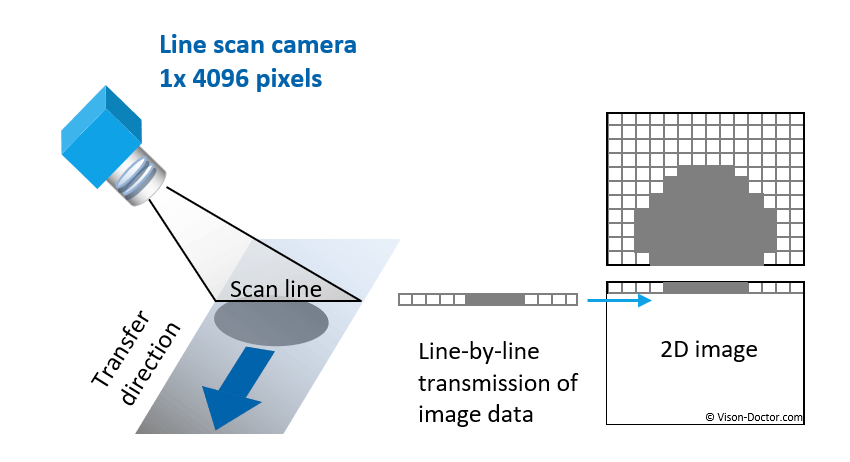


In [25]:
class lineScanCam:
    def __init__(self, focal, WD, CamSpecs):
        # Assign
        self.focal = focal  # Assuming focal length is in mm
        self.WD = WD  # Working distance in meters
        # Unpack the specs
        self.resolution_h, self.resolution_v = CamSpecs.get("Resolution", (0, 0))
        self.pixel_size_h, self.pixel_size_v = CamSpecs.get("Pixel Size", (0.0, 0.0))  # Assuming µm
        self.line_rate = CamSpecs.get("Line Rate", 0)
        # Small calculations

    def getFOV(self):
        # Convert focal length to meters from mm, same for pixel width
        focal_length_m = self.focal / 1000  # Convert mm to meters
        pixel_width_m = self.pixel_size_h / 1e6  # Convert µm to meters

        # Calculate sensor width
        sensor_width_m = self.resolution_h * pixel_width_m

        # Calculate FOV
        FOV = (sensor_width_m / focal_length_m) * self.WD
        return FOV

    def getSpartial(self):
        # Calculate spatial resolution in meters per pixel
        FOV = self.getFOV()
        spatial_resolution = FOV / self.resolution_h
        return spatial_resolution*1000

    def getMaxSpeed(self):
        # Calculate maximum speed in m/s then convert to km/h
        spatial_resolution = self.getSpartial()
        max_speed_m_per_s = spatial_resolution * self.line_rate
        max_speed_km_per_h = max_speed_m_per_s * 3.6
        return max_speed_km_per_h
    
    def calculateLineRate(self, speed_kmh):
        # Convert speed from km/h to m/s
        speed_ms = speed_kmh * 1000 / 3600

        # Calculate spatial resolution (in meters per pixel)
        spatial_resolution_m = self.getSpartial() / 1000  # Convert mm to meters

        # Calculate line rate in lines per second
        line_rate = speed_ms / spatial_resolution_m
        return line_rate
    
    def calculateMaxExposureTime(self, speed_kmh):
        # Convert speed from km/h to m/s
        speed_ms = speed_kmh * 1000 / 3600

        # Calculate spatial resolution (in meters per pixel)
        spatial_resolution_m = self.getSpartial() / 1000  # Convert mm to meters

        # Maximum exposure time to avoid motion blur (in seconds)
        max_exposure_time = spatial_resolution_m / speed_ms
        return max_exposure_time * 1000  # Return in milliseconds
    

    def __str__(self):
        return (f"Resolution: {self.resolution_h} x {self.resolution_v} pixels\n"
                f"Pixel Size: {self.pixel_size_h} x {self.pixel_size_v} µm\n"
                f"Line Rate: {self.line_rate} lines/s\n"
                f"FOV: {self.getFOV()} m\n"
                f"Spatial resolution: {self.getSpartial()} mm/pixel\n")

In [28]:
WD = 1.3
speed_kmh = 10 #km/h

print("--------------------------------")
# raL4096-48gm
CamSpecs2 = {
    "Resolution": (4096, 1),  # 4096 pixels in horizontal direction, 1 pixel in vertical direction
    "Pixel Size": (7.0, 7.0),  # µm
    "Line Rate": 200000  # lines/s
}

camera2 = lineScanCam(focal=8.5, WD=WD, CamSpecs=CamSpecs2)
print(camera2)

line_rate = camera2.calculateLineRate(speed_kmh)
max_exposure_time = camera2.calculateMaxExposureTime(speed_kmh)

print(f"Line rate at {speed_kmh} km/h: {line_rate} lines/sec")
print(f"Maximum exposure time to avoid motion blur: {max_exposure_time:.3f} ms")


--------------------------------
Resolution: 4096 x 1 pixels
Pixel Size: 7.0 x 7.0 µm
Line Rate: 200000 lines/s
FOV: 4.385129411764706 m
Spatial resolution: 1.0705882352941176 mm/pixel

Line rate at 10 km/h: 2594.6275946275946 lines/sec
Maximum exposure time to avoid motion blur: 0.385 ms
